## Black_Friday Dataset EDA And Feature Engineering 

### Cleaning and preparing the data for model training

In [18]:
# Dataset- https://www.kaggle.com/datasets/sdolezel/black-friday?resource=download
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [19]:
# import the dataset
train_df=pd.read_csv('train.csv')

In [20]:
train_df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [21]:
train_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [22]:
test_df.columns

NameError: name 'test_df' is not defined

In [23]:
# import the test dataset
test_df=pd.read_csv('test.csv')

In [24]:
df=train_df.append(test_df)

C:\Users\radha\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [25]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [27]:
df.describe()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,7.836670e+05
mean,0.409777,8.079300,5.366196,9.844506,12.668605,9263.968713,1.003029e+06
std,0.491793,6.522206,3.878160,5.089093,4.125510,5023.065394,1.727267e+03
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,1.000001e+06
25%,0.000000,2.000000,1.000000,5.000000,9.000000,5823.000000,1.001519e+06
50%,0.000000,7.000000,5.000000,9.000000,14.000000,8047.000000,1.003075e+06
75%,1.000000,14.000000,8.000000,15.000000,16.000000,12054.000000,1.004478e+06
max,1.000000,20.000000,20.000000,18.000000,18.000000,23961.000000,1.006040e+06


In [28]:
#axis=0 raw
#axis=1 column
df.drop(['User_ID'],axis=1,inplace=True)

In [29]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+


In [30]:
#df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

In [31]:
# map()used for mapping based on the condition 


# Handling the categorical feature Gender
df['Gender']=df['Gender'].map({'F':1,'M':0})

In [32]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,0-17,A,1,0,10,3,NaN,NaN,P00069042,8370.0,2
1,0-17,A,1,0,10,1,6.0,14.0,P00248942,15200.0,2
2,0-17,A,1,0,10,12,NaN,NaN,P00087842,1422.0,2
3,0-17,A,1,0,10,12,14.0,NaN,P00085442,1057.0,2
4,55+,C,0,0,16,8,NaN,NaN,P00285442,7969.0,4+


In [33]:
# Handling the categorical feature Age

In [34]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [35]:
#pd.get_dummies(df['Age'],drop_first=1)

In [36]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [37]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,1,A,1,0,10,3,NaN,NaN,P00069042,8370.0,2
1,1,A,1,0,10,1,6.0,14.0,P00248942,15200.0,2
2,1,A,1,0,10,12,NaN,NaN,P00087842,1422.0,2
3,1,A,1,0,10,12,14.0,NaN,P00085442,1057.0,2
4,7,C,0,0,16,8,NaN,NaN,P00285442,7969.0,4+


In [38]:
# for the training data we do fit_transform
# for the testing data we do transform

In [39]:
# second technique
from sklearn import preprocessing
label_encoding=preprocessing.LabelEncoder()
df['Age']=label_encoding.fit_transform(df['Age'])
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [40]:
# fixing categorical city_category
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [41]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [42]:
df=pd.concat([df,df_city],axis=1)

In [43]:
df.head(2)

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,0,A,1,0,10,3,NaN,NaN,P00069042,8370.0,2,0,0
1,0,A,1,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0


In [44]:
# drop City_Category feature
df.drop('City_Category',axis=1,inplace=True)

In [45]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,0,1,0,10,3,NaN,NaN,P00069042,8370.0,2,0,0
1,0,1,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,0,1,0,10,12,NaN,NaN,P00087842,1422.0,2,0,0
3,0,1,0,10,12,14.0,NaN,P00085442,1057.0,2,0,0
4,6,0,0,16,8,NaN,NaN,P00285442,7969.0,4+,0,1


In [46]:
df.isnull().sum()

Age                                0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
B                                  0
C                                  0
dtype: int64

In [47]:
# focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [48]:
## with respect to any categorical / discreate features 
   #the best way to replace missing values with mode
    
df['Product_Category_2'].mode()[0]

8.0

In [49]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2']).mode()[0]

In [50]:
df['Product_Category_2'].isnull().sum()

0

In [51]:
#Product_Category_3 replace missing values 
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [52]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [53]:
    
df['Product_Category_3'].mode()[0]

16.0

In [54]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3']).mode()[0]

In [55]:
df['Product_Category_3'].isnull().sum()

0

In [56]:
df.head(2)

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,0,1,0,10,3,8.0,16.0,P00069042,8370.0,2,0,0
1,0,1,0,10,1,8.0,16.0,P00248942,15200.0,2,0,0


In [57]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [58]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [59]:
df['Stay_In_Current_City_Years'][:5]

0    2
1    2
2    2
3    2
4    4
Name: Stay_In_Current_City_Years, dtype: object

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
B                             783667 non-null uint8
C                             783667 non-null uint8
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [61]:
# convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int32
B                             783667 non-null uint8
C                             783667 non-null uint8
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.3+ MB


In [63]:
df['B']=df['B'].astype(int)

In [64]:
df['C']=df['C'].astype(int)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int32
B                             783667 non-null int32
C                             783667 non-null int32
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


In [66]:
#visualization of age vs purchase


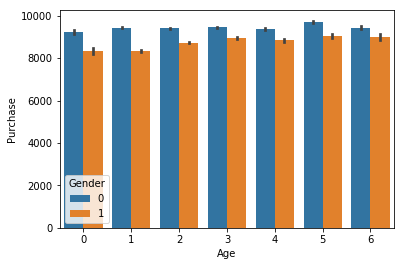

In [67]:
sns.barplot(df['Age'],df['Purchase'],hue=df['Gender'],data=df)

#### Observation- 
purchasing of men is high then women

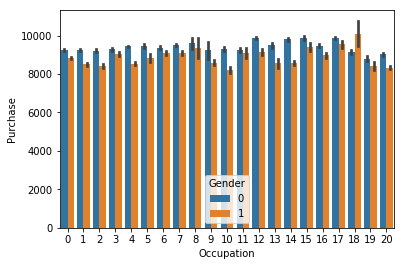

In [69]:
# visualization of purchase with occupation
sns.barplot(df['Occupation'],df['Purchase'],hue=df['Gender'],data=df)

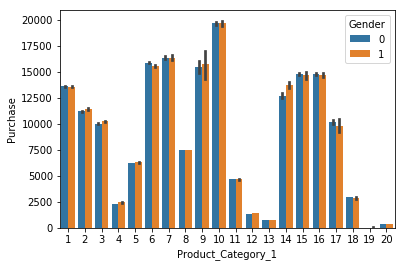

In [70]:
sns.barplot(df['Product_Category_1'],df['Purchase'],hue=df['Gender'],data=df)

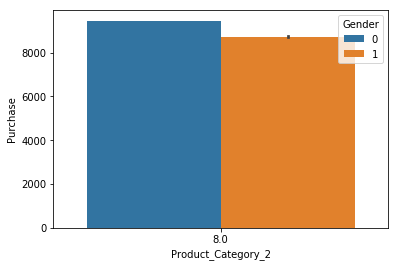

In [71]:
sns.barplot(df['Product_Category_2'],df['Purchase'],hue=df['Gender'],data=df)

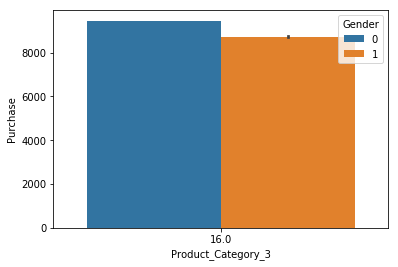

In [74]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [75]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,0,1,0,10,3,8.0,16.0,P00069042,8370.0,2,0,0
1,0,1,0,10,1,8.0,16.0,P00248942,15200.0,2,0,0
2,0,1,0,10,12,8.0,16.0,P00087842,1422.0,2,0,0
3,0,1,0,10,12,8.0,16.0,P00085442,1057.0,2,0,0
4,6,0,0,16,8,8.0,16.0,P00285442,7969.0,4,0,1


In [78]:
df_test=df[df['Purchase'].isnull()]


In [80]:
df_train=df[~df['Purchase'].isnull()]

In [84]:
x=df
#x.drop('Purchase',inplace=True,axis=1)
y=df['Purchase']


In [103]:
x.drop('Product_ID',axis=1,inplace=True)

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=0.33, random_state=42)

In [107]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [108]:
# Train the model